# Introduction to Pytorch


In this notebook, we are going to explore the basics of Pytorch, the deep learning pytonic library.  
The goal is to learn how to use it to implement complex deep learning models to use them in various projects and competitions.

This notebook corresponds to following the videos of sentdex from Youtube on Pytorch.

### Basic Torch Operations

Torch takes a lot from numpy, the math library it is based on.

In [1]:
import torch

In [2]:
x = torch.Tensor([5, 3])
y = torch.Tensor([2, 1])

x * y

tensor([10.,  3.])

In [3]:
z = torch.zeros([2, 5])
z

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [4]:
z.shape

torch.Size([2, 5])

In [5]:
w = torch.rand([2, 5])
w

tensor([[0.8462, 0.8048, 0.9736, 0.9234, 0.1274],
        [0.8660, 0.3702, 0.1006, 0.2321, 0.2755]])

In [6]:
# Reshape method
w.view([1, 10])

tensor([[0.8462, 0.8048, 0.9736, 0.9234, 0.1274, 0.8660, 0.3702, 0.1006, 0.2321,
         0.2755]])

### Data

We are going to play around the MNIST Dataset to understand the basics and fundamentals of data manipulation with and for pytorch.

In [7]:
import torchvision
from torchvision import transforms, datasets

In [8]:
train = datasets.MNIST('',
                       train=True,
                       download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('',
                      train=False,
                      download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

In [9]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

## Visualizing

In [11]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [12]:
x, y = data[0][0], data[1][0]
print(y)

tensor(3)


In [12]:
import matplotlib.pyplot as plt 

plt.imshow(data[0][0].view(28, 28));

In [13]:
data[0][0].shape

torch.Size([1, 28, 28])

## Balanced dataset?

In [14]:
counter_dict = {x:0 for x in range(10)}

In [15]:
total = 0
for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1 
        total += 1

In [16]:
counter_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [17]:
total

60000

Percentage distribution

In [18]:
for i in counter_dict:
    print(f'{i} : {counter_dict[i] / total}')

0 : 0.09871666666666666
1 : 0.11236666666666667
2 : 0.0993
3 : 0.10218333333333333
4 : 0.09736666666666667
5 : 0.09035
6 : 0.09863333333333334
7 : 0.10441666666666667
8 : 0.09751666666666667
9 : 0.09915


## First Neural Network

In [19]:
import torch.nn as nn
import torch.nn.functional as F

In [20]:
train[0][0].numel() #28*28

784

In [21]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(in_features=28*28, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

In [22]:
net = Net()

In [23]:
net

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [24]:
X = torch.rand((28, 28))

In [25]:
X = X.view(1, 28*28)

In [26]:
net.forward(X)

tensor([[-2.3400, -2.2879, -2.1966, -2.1997, -2.3270, -2.3678, -2.2229, -2.3573,
         -2.4373, -2.3173]], grad_fn=<LogSoftmaxBackward>)

## Training

In [27]:
import torch.optim as optim

In [30]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [38]:
# epoch = full pass through the data
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28 * 28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(f'Epoch #{epoch} → {loss}')

Epoch #0 → 0.008239984512329102
Epoch #1 → 0.021681571379303932
Epoch #2 → 0.0033586081117391586


In [41]:
correct = 0
total = 0

with torch.no_grad():
    for key, dataset in {'train_set': trainset, 'test_set': testset}.items():
        for data in dataset:
            X, y = data
            output = net(X.view(-1, 28 * 28))
            for idx, i in enumerate(output):
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1
        print(f'Accuracy for {key} : {round(correct/total, 3)}')

Accuracy for train_set : 0.978
Accuracy for test_set : 0.976


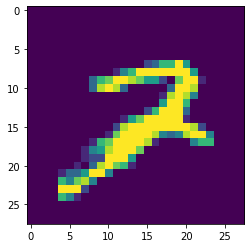

In [46]:
plt.imshow(X[1].view(28, 28));

In [47]:
torch.argmax(net(X[1].view(-1, 28*28))[0])

tensor(7)